## Практикум по Pandas

In [14]:
import pandas as pd
import numpy as np

In [15]:
# метод aggregate появился в версии Pandas 0.20.0
# если выдается ошибка AttributeError: 'DataFrame' object has no attribute 'aggregate', то надо обновить Pandas:
# conda update pandas
# или conda update conda

In [16]:
# если вы запускаете notebook в другом ядре (например, питон 3.6 при основной версии питона на компьютере 2.7), то
# обновляем версию Pandas для этого ядра:
# смотрим какие ядра установлены: conda info --envs
# активируем нужное ядро: source activate python3 (в Windows команда без source)
# обновляем Pandas: conda update pandas

In [17]:
# проверяем версию Pandas
pd.__version__

'0.24.2'

### Создание DataFrame из листов и словарей

In [18]:
dataList = [
    { 'date': '2017-07-01', 'value': 100 },
    { 'date': '2017-07-02', 'value': 200 },
    { 'date': '2017-07-03', 'value': 300 },
    { 'date': '2017-07-04', 'value': 400 },
    { 'date': '2017-07-05', 'value': 500 },
]

In [19]:
pd.DataFrame( dataList )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [20]:
# то же самое, но в другом виде
# задаем столбцы

dataDict = {
    'date': [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ],
    'value': [ 100, 200, 300, 400, 500 ]
}

pd.DataFrame.from_dict( dataDict )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [21]:
# для сохранения порядка следования элементов можем использовать лист вместо словаря

dataDict = [
    ( 'date', [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ] ),
    ( 'value', [ 100, 200, 300, 400, 500 ] )
]

pd.DataFrame.from_items( dataDict )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [22]:
# лист кортежей с указанием заголовков
dataLists = [
    ('2017-07-01', 100),
    ('2017-07-02', 200),
    ('2017-07-03', 300),
    ('2017-07-04', 400),
    ('2017-07-05', 500),
]

headers = [ 'date', 'value' ]
pd.DataFrame.from_records( dataLists, columns = headers )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


### Создание Series

In [23]:
# можно использовать Numpy для генерации данных
dataNP = np.random.rand( 3 )

In [24]:
dataNP

array([0.26690999, 0.28950791, 0.17678585])

In [25]:
pd.Series( dataNP, index = [ 'first', 'second', 'third' ] )

first     0.266910
second    0.289508
third     0.176786
dtype: float64

### Импорт данных для DataFrame из файлов

In [26]:
data = pd.read_csv('train.csv', delimiter=',')

In [29]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [31]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# указываем разделитель столбцов в файле
# заголовок у файла есть, но можно задать свои названия (удобно, если изначально они на русском)
# выводим первые 10 строк

data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [33]:
# основная информация о нашем DataFrame
# хорошо показывает в каких данных много пропусков
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Столбцы SibSp и Parch (наличие родственников среди пассажиров) распознаны как целое число. Если надо это исправить, то используем dtype:

In [34]:
data = pd.read_csv( 'train.csv', delimiter = ',', dtype = {'SibSp': str, 'Parch': str} )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [35]:
# статистика DataFrame
# вывод зависит от типа данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

data.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


### Распределение значений столбца

In [36]:
type(data['Pclass'])

pandas.core.series.Series

In [37]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Гистограмма распределения

In [38]:
# рисуем в браузере
%matplotlib inline

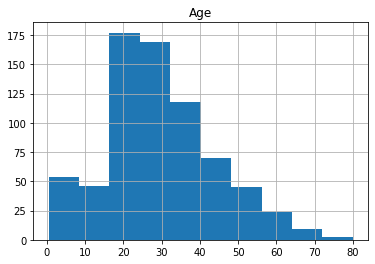

In [40]:
data.hist( column = ['Age'] );

Можно и так:

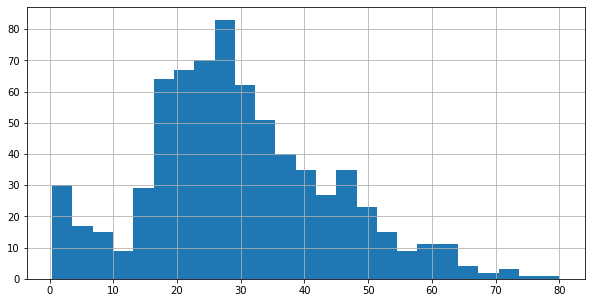

In [46]:
data['Age'].hist(bins = 25, figsize = (10, 5))

### Упражнение

Загрузите в датафрейм mountains содержимое файла Mountains.csv. Посчитайте следующие показатели:
1. Минимальную и максимальную высоту гор в этом наборе

2. В каком году было впервые покорено наибольшее количество вершин (столбец First ascent)?

3. Постройте распределение распределение First ascent по годам

### by guryanoffilya*


In [61]:
df = pd.read_csv('Homework/Mountains.csv')

In [64]:
df.head()

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0


In [50]:
df['Height (m)'].max()

8848

In [51]:
df['Height (m)'].min()

7200

In [63]:
df['First ascent'].value_counts().head()

1960    7
1976    6
1956    6
1975    5
1964    4
Name: First ascent, dtype: int64

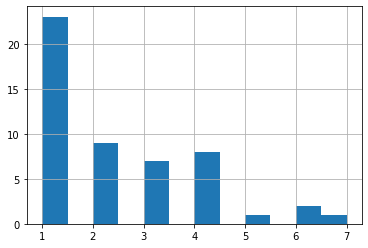

In [71]:
df['First ascent'].value_counts().hist(bins=12);

### Поэлементные действия с DataFrame

In [72]:
# зададим два DataFrame

df1 = pd.DataFrame( [ (0, 1), (2, 3), (4, 5) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1
1,2,3
2,4,5


In [73]:
df2 = pd.DataFrame( [ (10, 11), (12, 13), (14, 15), (17, 18) ], columns = [ 'value1', 'value3' ] )
df2

,value1,value3
0,10,11
1,12,13
2,14,15
3,17,18


In [74]:
# функция сложения
df1.add( df2 )

,value1,value2,value3
0,10.0,NaN,NaN
1,14.0,NaN,NaN
2,18.0,NaN,NaN
3,NaN,NaN,NaN


In [ ]:
# для несовпадающих строк используем значение из fill_value
df1.add( df2, fill_value = 100 ).fillna(0)

### mul - перемножение

In [75]:
df1.mul( df2, fill_value = 0 )

,value1,value2,value3
0,0.0,0.0,0.0
1,24.0,0.0,0.0
2,56.0,0.0,0.0
3,0.0,NaN,0.0


### div - поэлементное деление DataFrame

In [76]:
df1.div( df2, fill_value = 17 )

,value1,value2,value3
0,0.000000,0.058824,1.545455
1,0.166667,0.176471,1.307692
2,0.285714,0.294118,1.133333
3,1.000000,NaN,0.944444


### Разность DataFrame

In [77]:
df1.sub( df2 )

,value1,value2,value3
0,-10.0,NaN,NaN
1,-10.0,NaN,NaN
2,-10.0,NaN,NaN
3,NaN,NaN,NaN


### Корректное копирование DataFrame

In [ ]:
# зададим DataFrame

df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

In [ ]:
# делаем его "копию"

df2 = df1

In [ ]:
# Изменяем значение ячейки в "копии"

df2['value1'][0] = 555

In [ ]:
df2

Смотрим что произошло с исходным

In [ ]:
df1

Сделаем "настоящую" копию

In [ ]:
df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

In [ ]:
df2 = df1.copy()

In [ ]:
df2['value1'][0] = 555

In [ ]:
df2

In [ ]:
df1

### Сводные таблицы

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# index - значения столбца, которые будут в строках
# columns - значения столбца, которые образуют столбцы
# values - значения в ячейках таблицы
# aggfunc - функция, которая будет применена к значениям

# среднее значение столбца 'Age' в разбивке по Sex и Embarked
pd.pivot_table( data, index = ['Sex', 'Pclass'], columns = ['Embarked'], values = 'Age', aggfunc = np.mean )

### Apply - применить функцию в столбцу или строке

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(20)

In [ ]:
def ageGroup( row ):
    """
    Простая функция отнесения возраста к группе
    """
    
    # проверяем, что значение возраста не равно NaN
    if not pd.isnull( row['Age'] ):
        if row['Age'] <= 18:
            return 'Child'

        if row['Age'] >= 65:
            return 'Retiree'

        return 'Young'
    
    # если значение возраста NaN, то возвращаем Undef
    return 'Undef'

In [ ]:
# применим функцию ageGroup к DataFrame и выведем результат в отдельный столбец ageGroup

data['ageGroup'] = data.apply( ageGroup, axis = 1 )
data.head(10)

### Applymap - применяем функцию к каждой ячейке отдельно

In [ ]:
# например, устанавливаем формат отображения

df = pd.DataFrame( np.random.randn( 10, 3 ), columns = ['first', 'second', 'third'] )
df

In [ ]:
df.apply( lambda x: x**2 )

## Упражнение

Классифицируйте высоту гор и посчитайте распределение количества вершин по этой классификации:
* высота до 7500 метров - High
* до 8000 метров - Very high
* более 8000 метров - Extremely high

### Сохранение DataFrame

In [ ]:
data.head()

In [ ]:
data.to_

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
# разделитель sep по умолчанию запятая
# na_rep - что ставим на место пустых ячеек
# columns - какие столбцы хотим записать
# index - включать ли номер строки

data.to_csv( 'train_modified.csv', sep = ';', na_rep = '0', columns = ['Survived', 'ageGroup'], index = False )

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html
# при сохранении в JSON может быть несколько вариантов группировки данных

# orient = index - строки имеют вид
# {"0":{"PassengerId":1,"Survived":0,"Pclass":3,"Name":"Braund, Mr. Owen Harris","Sex":"male","Age":22.0,"SibSp":1,"Parch":0,"Ticket":"A\/5 21171","Fare":7.25,"Cabin":null,"Embarked":"S","ageGroup":"Young"}

data.to_json( 'train_json_index.json', orient = 'index' )

In [ ]:
# другие варианты

data.to_json( 'train_json_columns.json', orient = 'columns' )
data.to_json( 'train_json_records.json', orient = 'records' )

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html
# сохранение в Excel

data.to_excel( 'train_modified.xlsx', sheet_name = 'data' )

### Типовые действия с DF

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(3)

In [ ]:
# выбрать все строки и подмножество столбцов

dataSelected = data.loc[:3, ['Name', 'Age', 'Cabin']]
dataSelected.head()

In [ ]:
# добавляем к фильтру строки
# например, с третьей до последней

dataSelected = data.loc[2:15, ['Name', 'Age', 'Cabin']]
dataSelected.head()

### Добавить столбцы

In [ ]:
# посчитаем количество слов в столбце Name
# сначала разбиваем на слова

data['nameLength'] = data['Name'].str.split(' ')
data.head()

In [ ]:
# добавляем подсчет количества слов

data['nameLength'] = data['Name'].str.split(' ').str.len()
data.head()

In [ ]:
# удаляем наши вычисления

del data['nameLength']
data.head()

In [ ]:
# переименование столбца
# параметр inplace указывает, что надо подставить новое значение в самом DataFrame data

data.rename( columns = { 'Name': 'FIO' }, inplace=True )
data.head()

In [ ]:
# можно заменить названия столбцов
# например, иногда русские названия в исходных данных доставляют трудности

data.columns = [ 'ID', 'Survived', 'Class', 'FIO', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticker number', 'Fare', 'Cabin', 'Emnarked' ]
data.head()

### Действия со строками

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# выбрать нужные строки
# например, со второй по пятую

data.loc[ 0:1 ]

In [ ]:
# выбор с набором значений
# строки с номерами 1, 2, 3 и 44

dataNew = data.iloc[ [1, 2, 3, 44] ]

In [ ]:
dataNew

In [ ]:
# индексы теперь идут не по порядку
# исправляем

dataNew.reset_index(inplace=True)

In [ ]:
dataNew

In [ ]:
del dataNew['index']

In [ ]:
dataNew

In [ ]:
# можно задать маску, по которой будут фильтроваться строки
# например, ID пассажира делится на 2

mask = ( data.PassengerId % 2 == 0 )

In [ ]:
mask[:5]

In [ ]:
data.loc[ mask ].head()

In [ ]:
data[ data.PassengerId % 2 == 0 ].head()

### Работа с пустыми значениями

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

In [ ]:
# В столбце Age довольно много пустых значений
data.info()

In [ ]:
# посмотрим что это за строки

data.loc[ pd.isnull( data['Age'] ) ].head()

In [ ]:
# если надо исключить условие, то ставим тильду:

data.loc[ ~pd.isnull( data['Age'] ) ].head()

In [ ]:
# заменим пустые значения столбца Age на медиану

medianAge = data['Age'].median()
medianAge

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

data['Age'].fillna( medianAge, inplace = True )

In [ ]:
# итак, значение для строки с индексом 5 (было NaN) заменено на среднее

data.head(10)

### Сортировка

In [ ]:
# сортировка по индексу
data.sort_index( ascending = False ).head()

In [ ]:
# сортировка по значениям
data.sort_values( by = 'Age', ascending = False ).head()

In [ ]:
# сортировка по значениям нескольких столбцов
data.sort_values( by = ['Sex', 'Age'], ascending = [True, False] ).head()

### Агрегация и группировка

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# число непустых строк в DataFrame
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html

data.count()

In [ ]:
# для отдельного столбца

data['Age'].count()

In [ ]:
# сумма
data.sum()

In [ ]:
# среднее значение
data.mean()

In [ ]:
# комбинация функций
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

data.aggregate( ['sum', 'mean'] )

In [ ]:
# агрегация по столбцам (agg - синоним aggregate)

data.agg( { 'Age': ['mean'], 'Survived': ['mean', 'sum'] } )

In [ ]:
# группировка по столбцу с вычислением среднего

data.groupby( 'Sex' ).mean().reset_index()

In [ ]:
# группировка по нескольким столбцам одновременно

data.groupby( ['Sex', 'Age'] ).mean()

### Объединение DataFrame

Merge - аналог JOIN в SQL

In [ ]:
# заведем два DataFrame

df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
} )

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
} )

In [ ]:
df2

In [ ]:
# сохраняем все значения ключей, которые есть в df1
# если нужно несколько столбцов, то пишем left_on = ['key1', ...] и right_on = ['key2', ...]

df1.merge( df2, how = 'left', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем все значения ключей, которые есть в df2

df1.merge( df2, how = 'right', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем все значения ключей (объединение)

df1.merge( df2, how = 'outer', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем только общие значения ключей

df1.merge( df2, how = 'inner', left_on = 'key1', right_on = 'key2' )

Concat - совмещение DataFrame

In [ ]:
# объединение DataFrame путем обычного "склеивания"
pd.concat( [df1, df2] )

In [ ]:
# горизонтальное объединение
pd.concat( [df1, df2], axis = 1 )

Join - объединение по индексу

In [ ]:
df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
    },
    index = ['0', '1', '2', '3'])

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
    },
    index = ['2', '3', '4', '5'])

In [ ]:
df2

In [ ]:
# для join надо указать lsuffix и rsuffix

df1.join( df2, how = 'left', lsuffix = '_df1', rsuffix = '_df2' )